In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from time import time as t
from numba import jit

import json
# import io

# import datetime

import astropy
import astropy.units as u
import astropy.constants as c

# from IPython.display import Image, display_png

from astroquery.simbad import Simbad

import photontools

from IPython.display import display
import matplotlib.colors as colors

import mosfit
import corner
# import json
# import matplotlib.pyplot as plt
# import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
from collections import OrderedDict
from mosfit.plotting import bandcolorf


In [2]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 150

lss = ['-', '--', '-.', ':']

In [3]:
filepath_hewd = "../../hewd_hr/gamtmp.d"
filepath_cowd = "../../cowd100x50x50/gamtmp.d"

directory_ML = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/WhiteDwarf_Thermonuclear_Transients/"
filepaths_spectra_ML = subprocess.getoutput('find "{}/WD06_spectra/" | grep ".par" | sort'.format(directory_ML)).split("\n")[1:]

vel_cowd = np.array([2.56466437e+03, 1.18143578e+04, -1.41779372e+00]) * 1e5
vel_hewd = np.array([4.49999438e+03, 1.54867843e+04, 1.27477734e+01]) * 1e5
# f_ = open(filepath_, mode="r") 

In [4]:
# bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "U", "B", "V", "R", "I", "J", "H", "K"])
# color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
# dict_color = dict(zip(bands_from_blue, color_from_blue))

bands_from_blue = np.array(["g", "r", "i", "z"])
color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
#     color_from_blue = np.array([plt.cm.viridis(i/bands_from_blue.size) for i in range(1, bands_from_blue.size+1)])
dict_color = dict(zip(bands_from_blue, color_from_blue))


In [5]:
filepath_catalog_lc = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/catalog/fast_transients/2014ApJ...794...23D/table2.dat"
filepath_catalog_head = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/catalog/fast_transients/2014ApJ...794...23D/table1.dat"


In [6]:
columns_ = ["category", "name", "yaer", "month", "day", "ra_h", "ra_min", "ra_s", 
            "dec_deg", "dec_arcmin", "dec_arcsec", 
            "z", "distance", 
            "lambdag", "lambdar", "lambdai", "lambdaz", "Eb_v"]
df_catalog_head = pd.read_csv(filepath_catalog_head, delim_whitespace=True, header = None, names=columns_)
df_catalog_head.replace("---", np.nan, inplace=True)
df_catalog_head[columns_[11:]] = df_catalog_head[columns_[11:]].astype(float)
df_catalog_head = df_catalog_head[[st in ["A", "B"] for st in df_catalog_head["category"]]]


In [7]:
names_ = ["name", "Filter", "MJD", "Phase", "mag_upper", "mag", "emag", "Instrument"]
df_lc = pd.read_csv(filepath_catalog_lc, delim_whitespace=True, header = None, names=names_)
df_lc["mag_upper"].replace("<", True, inplace=True)
df_lc["mag_upper"].replace(np.nan, False, inplace=True)
df_lc

,name,Filter,MJD,Phase,mag_upper,mag,emag,Instrument
0,PS1-10ah,g_P1,55248.5,-2.7,False,22.18,0.22,PS1
1,PS1-10ah,g_P1,55230.5,-19.5,True,22.38,NaN,PS1
2,PS1-10ah,g_P1,55233.5,-16.7,True,22.60,NaN,PS1
3,PS1-10ah,g_P1,55236.6,-13.8,True,22.40,NaN,PS1
4,PS1-10ah,g_P1,55239.5,-11.1,True,22.75,NaN,PS1
5,PS1-10ah,g_P1,55242.5,-8.3,True,22.70,NaN,PS1
6,PS1-10ah,g_P1,55251.4,0.0,False,19.95,0.05,PS1
7,PS1-10ah,g_P1,55266.5,14.1,False,21.64,0.17,PS1
8,PS1-10ah,g_P1,55281.3,27.8,True,22.02,NaN,PS1
9,PS1-10ah,g_P1,55293.4,39.1,True,22.26,NaN,PS1


In [8]:
class Transient(object):
    def __init__(self):
        self.name = None
        self.instrument = None
        self.Nphoton = None
        self.redshift = None
        self.luminosity_distance = None
        self.Eb_v = None
        self.maxdate = None
        self.bands = None
        self.data = None # flux/mag with the same order as self.bands [N_band][N_time, 3] 3: time, flux/mag, error of flux/mag
        self.spectra = None # just for stock json data

In [9]:
def calc_model_lc(spectra, transient, filter):
    spectra_ = copy.deepcopy(spectra)
    spectra_ = spectra_.redshift(z=transient.redshift)
    spectra_ = spectra_.dust_extinction(Eb_v = transient.Eb_v, model="maeda")
    lc = photontools.calc_band_flux(spectra_, filter)
    if (u.get_physical_type((transient.luminosity_distance * u.m / u.m).unit) == "length"):
        lc = lc.convert_flux_to_magnitude(filter, system="AB", distance=transient.luminosity_distance)
    elif (u.get_physical_type((transient.luminosity_distance * u.m / u.m).unit) == "dimensionless"):
        lc = lc.convert_flux_to_magnitude(filter, system="AB", distance=transient.luminosity_distance * u.Mpc)
    else:
        raise ValueError("Input luminosity_distnace unit is wrong!")
    return lc

In [10]:
def plot_panstarrs(fig, ax, name, df_header, df_lc):
    
    def get_information_from_df_header(name, df_header):
        df_this = df_header[df_header["name"] == name].iloc[0]
        transient = Transient()
        transient.name = name
        transient.redshift = df_this["z"]
        transient.luminosity_distance = df_this["distance"] # Mpc
        transient.Eb_v = df_this["Eb_v"]
        transient.bands = np.array(["g", "r", "i", "z"])
        transient.data = [[]] * transient.bands.size
        
        return transient

    def get_light_curve_from_df_lc(name, transient, df_lc):
#         transient.bands
        df_this = df_lc[df_lc["name"] == name].sort_values("MJD")
        for i, band in enumerate(transient.bands):
            df_band = df_this[[df_this.loc[j, "Filter"][0] == band for j in df_this.index]]
            transient.data[i] = df_band[["MJD", "Phase", "mag_upper", "mag", "emag"]]
            
        return transient
    
    transient = get_information_from_df_header(name, df_header)
    transient = get_light_curve_from_df_lc(name, transient, df_lc)
    
    for i, band in enumerate(transient.bands):
        # detection
        df_ = transient.data[i][~transient.data[i]["mag_upper"]]
        ax.errorbar(df_["Phase"], df_["mag"], df_["emag"], fmt="--o", color=dict_color[band], label=band)
#         upper limit
        df_ = transient.data[i][transient.data[i]["mag_upper"]]
        ax.errorbar(df_["Phase"], df_["mag"], fmt="v", color=dict_color[band], label="")
        
    return transient, fig, ax

def plot_model(fig, ax, lc, time_shift = 0., **keys):
    for i, theta in enumerate(lc.thetas):
        for j, phi in enumerate(lc.phis):
            for k, band in enumerate(lc.bands):
                if band != "y":
                    ax.plot((lc.times - time_shift) * lc.Doppler_shift_intrinsic[i,j], lc.data[:,i,j,k], color=dict_color[band], **keys)
    return fig, ax

In [11]:
filter_ps = photontools.read_one_instrument_filters("./photontools/filter_data/panstarrs/")

In [12]:
%time spectra_hewd = photontools.read_Maeda_data(filepath_hewd)
%time spectra_cowd = photontools.read_Maeda_data(filepath_cowd)

CPU times: user 6.51 s, sys: 11.8 s, total: 18.3 s
Wall time: 22.3 s
CPU times: user 4.98 s, sys: 9.57 s, total: 14.6 s
Wall time: 16.2 s


# preprocess spectra

In [13]:
%time spectra_hewd = spectra_hewd.binning(N_theta_bins=10, N_phi_bins=10)
%time spectra_cowd = spectra_cowd.binning(N_theta_bins=10, N_phi_bins=10)
%time spectra_hewd = spectra_hewd.Doppler_shift_by_intrinsic_velocity(vel_hewd)
%time spectra_cowd = spectra_hewd.Doppler_shift_by_intrinsic_velocity(vel_cowd)


CPU times: user 4.56 s, sys: 3.05 s, total: 7.61 s
Wall time: 8.26 s
CPU times: user 3.54 s, sys: 2.39 s, total: 5.94 s
Wall time: 6.27 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 1.06 s, sys: 111 ms, total: 1.17 s
Wall time: 1.2 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 1.08 s, sys: 81.1 ms, total: 1.16 s
Wall time: 1.19 s


In [15]:
def plot_model(fig, ax, lc, time_shift = 0., **keys):
    for i, theta in enumerate(lc.thetas):
        for j, phi in enumerate(lc.phis):
            for k, band in enumerate(lc.bands):
                if band != "y":
                    ax.plot((lc.times - time_shift) * lc.Doppler_shift_intrinsic[i,j], lc.data[:,i,j,k], color=dict_color[band], **keys)
    return fig, ax

In [16]:
df_catalog_head["name"]

0     PS1-10ah
1    PS1-10bjp
2     PS1-11qr
3     PS1-12bb
4     PS1-12bv
5    PS1-12brf
6    PS1-11bbq
7    PS1-13duy
8    PS1-13dwm
9    PS1-13ess
Name: name, dtype: object

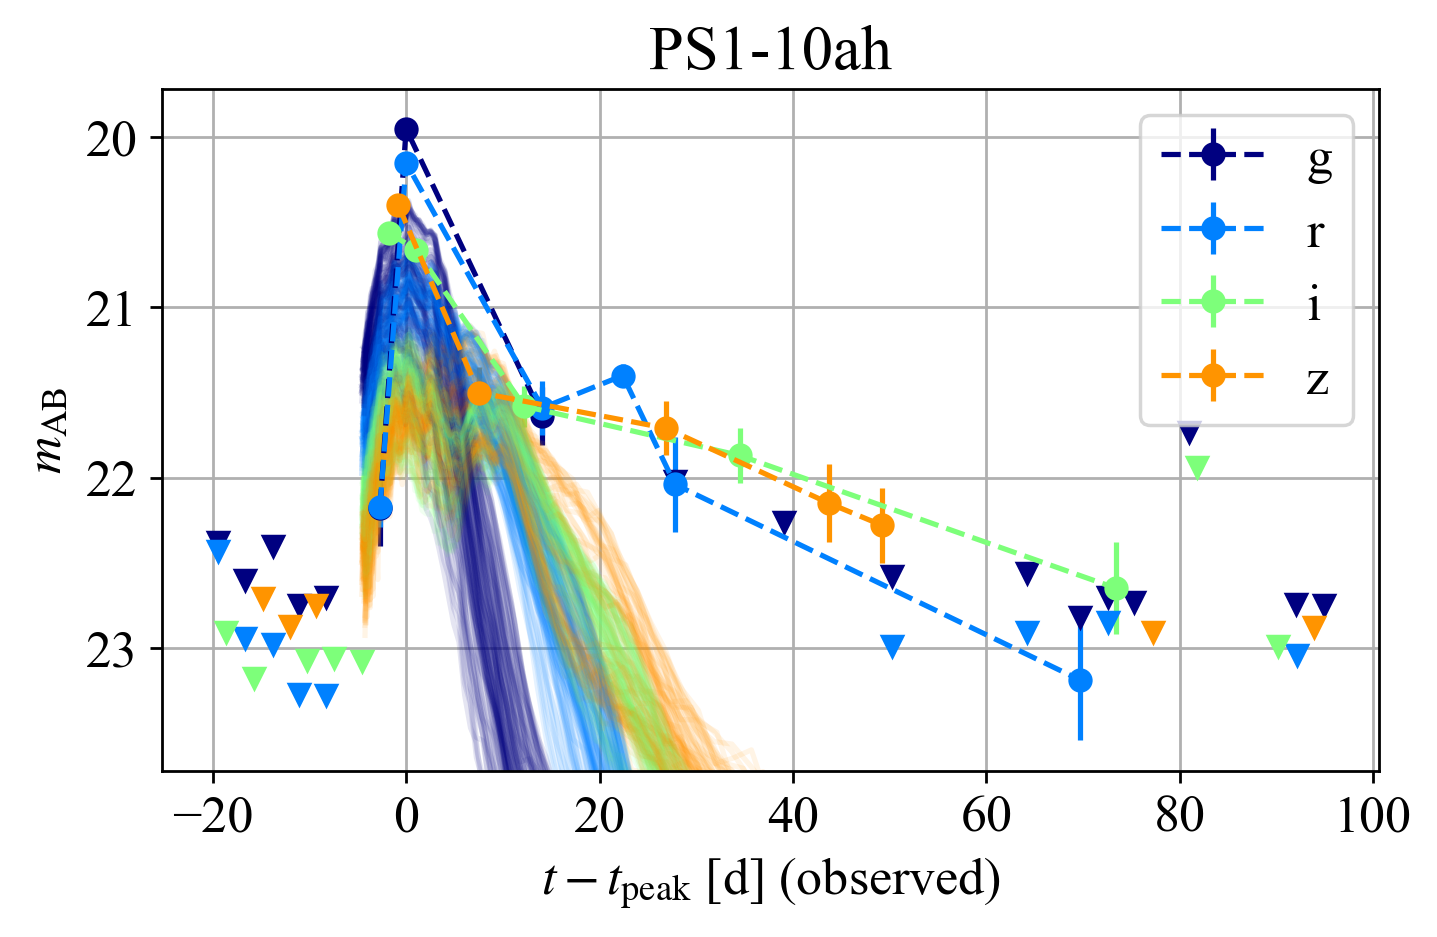

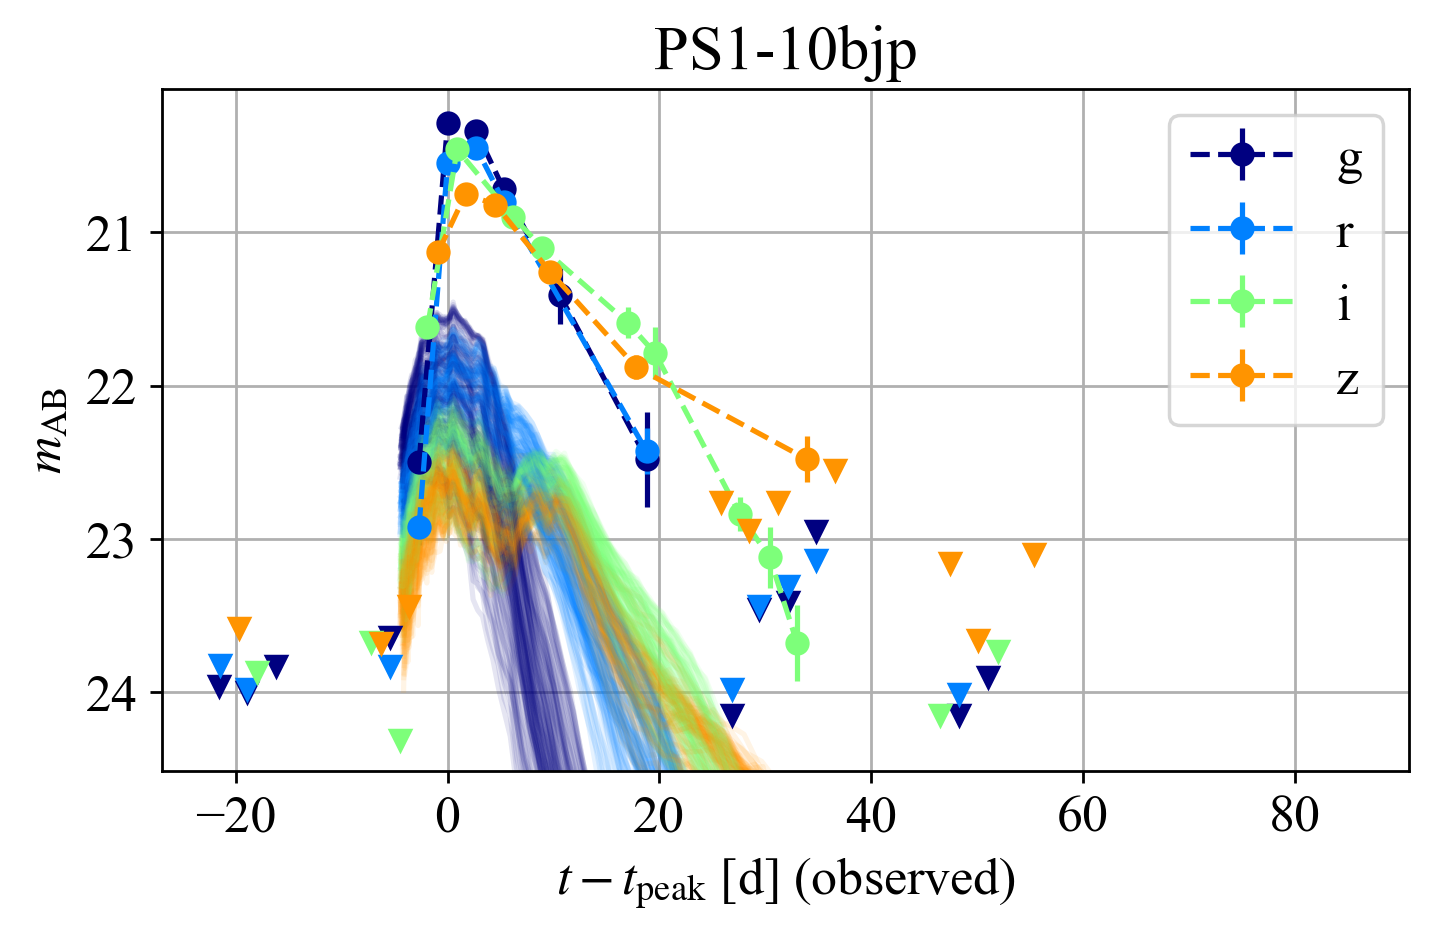

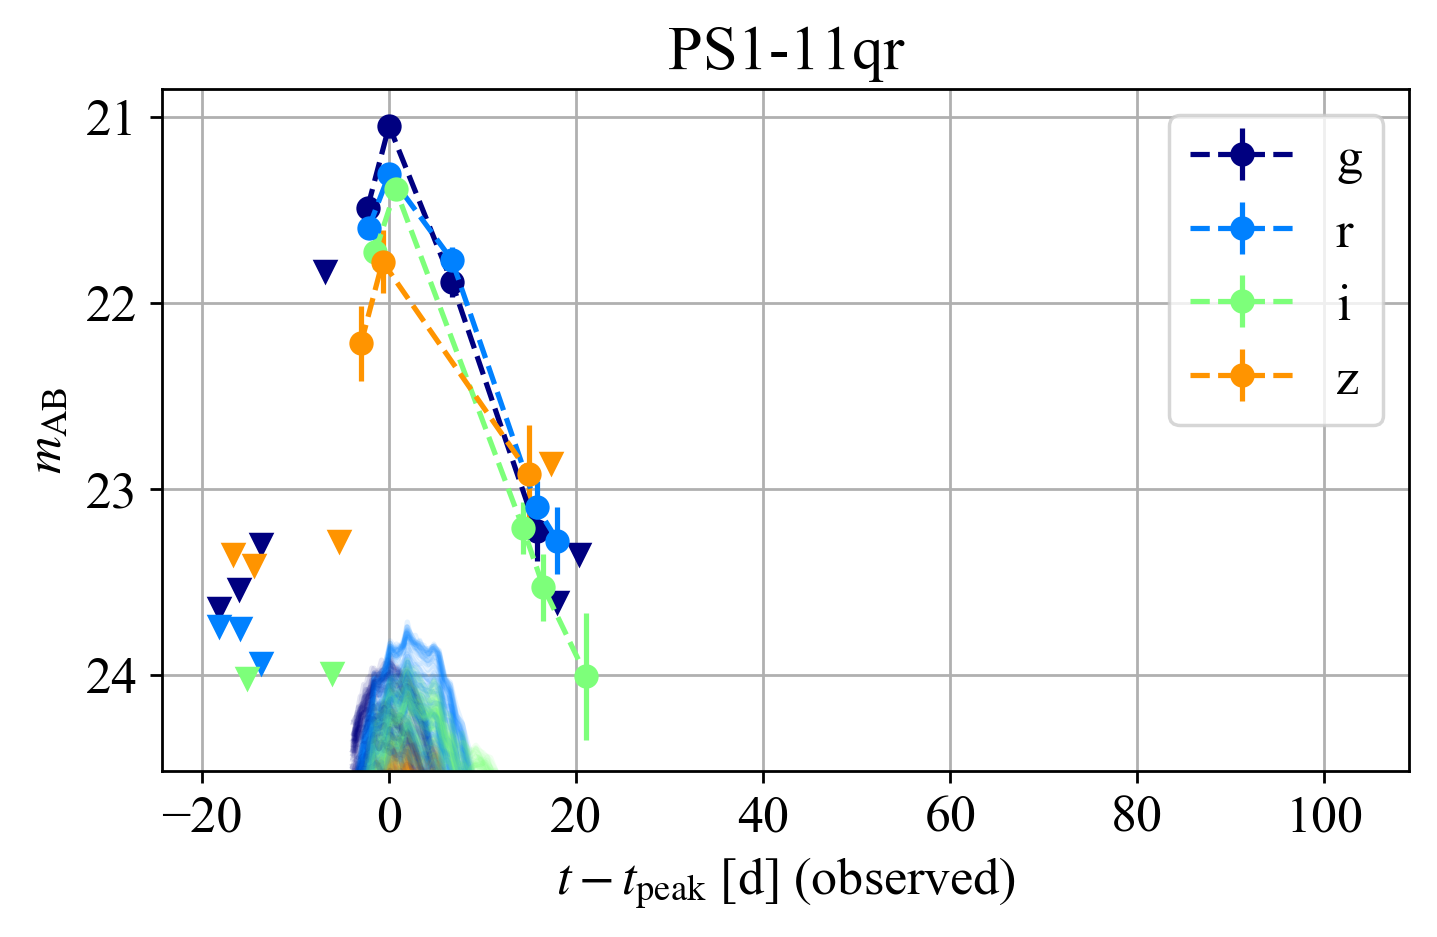

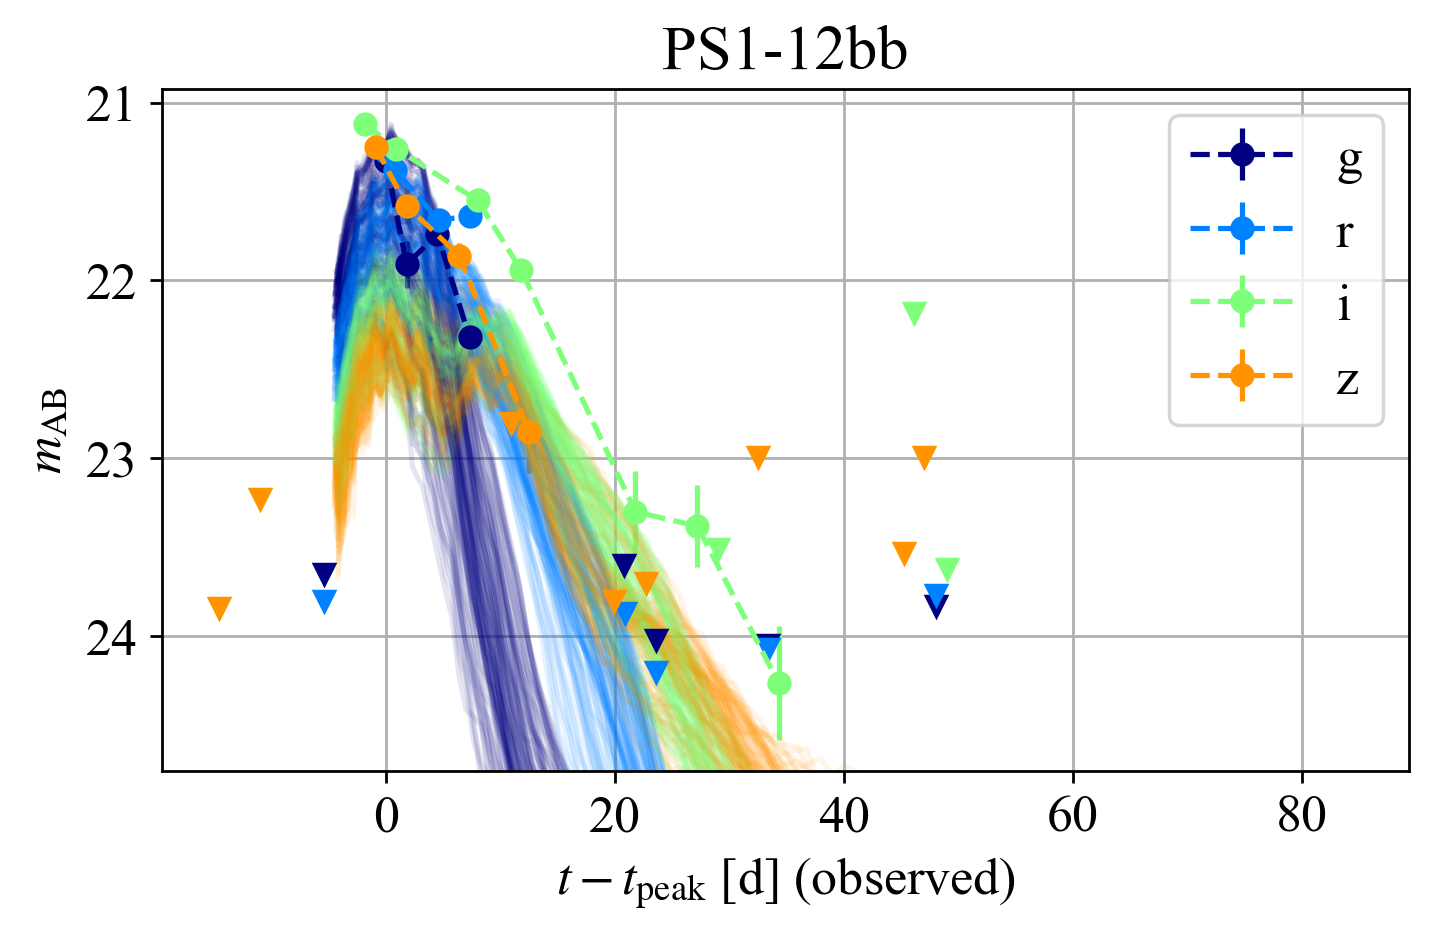

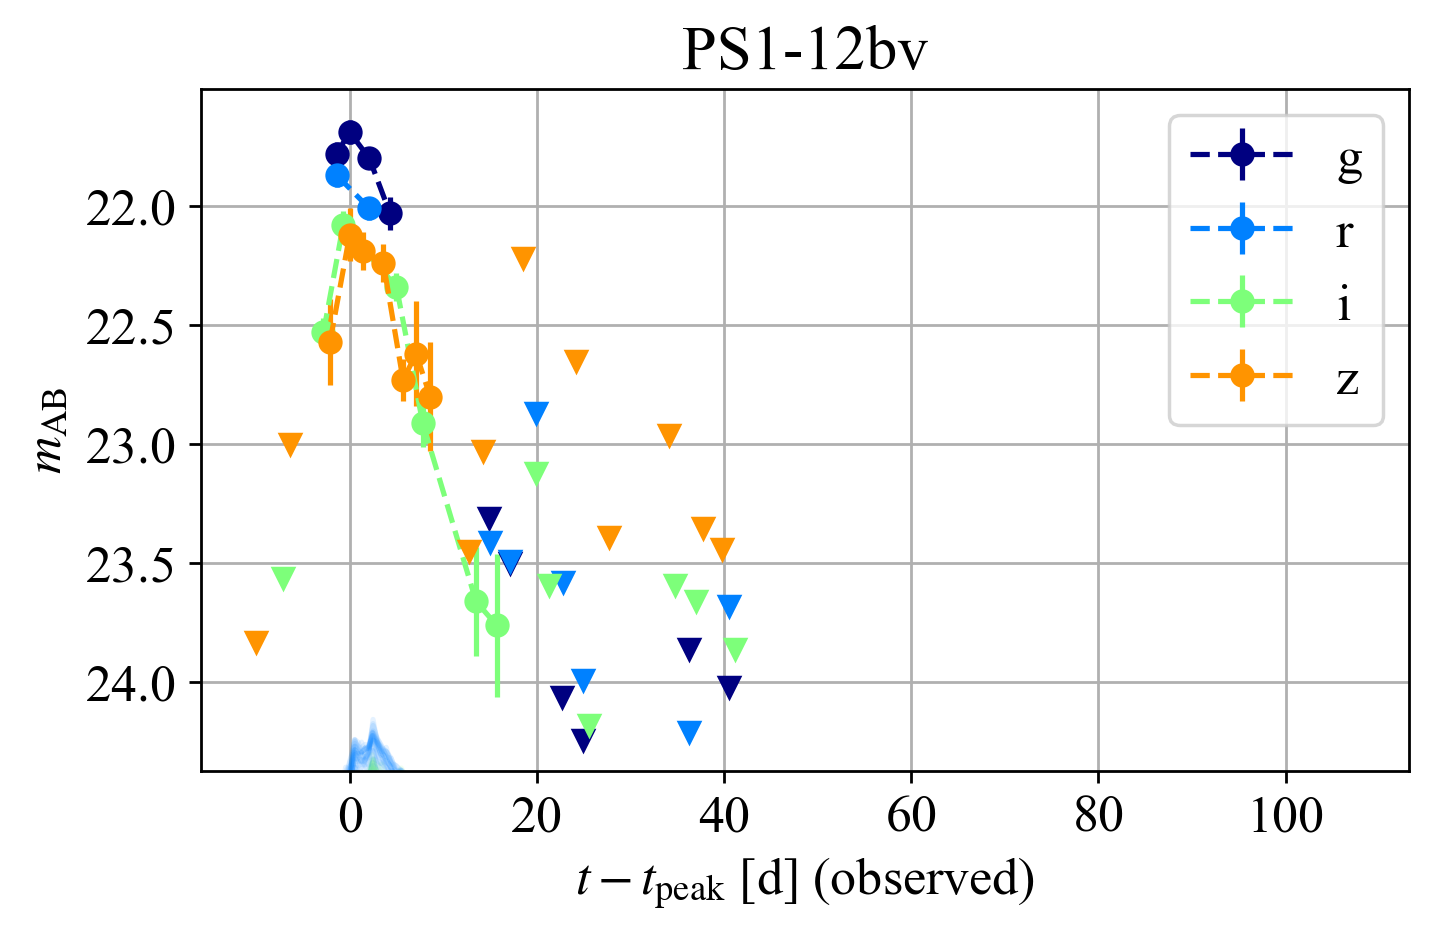

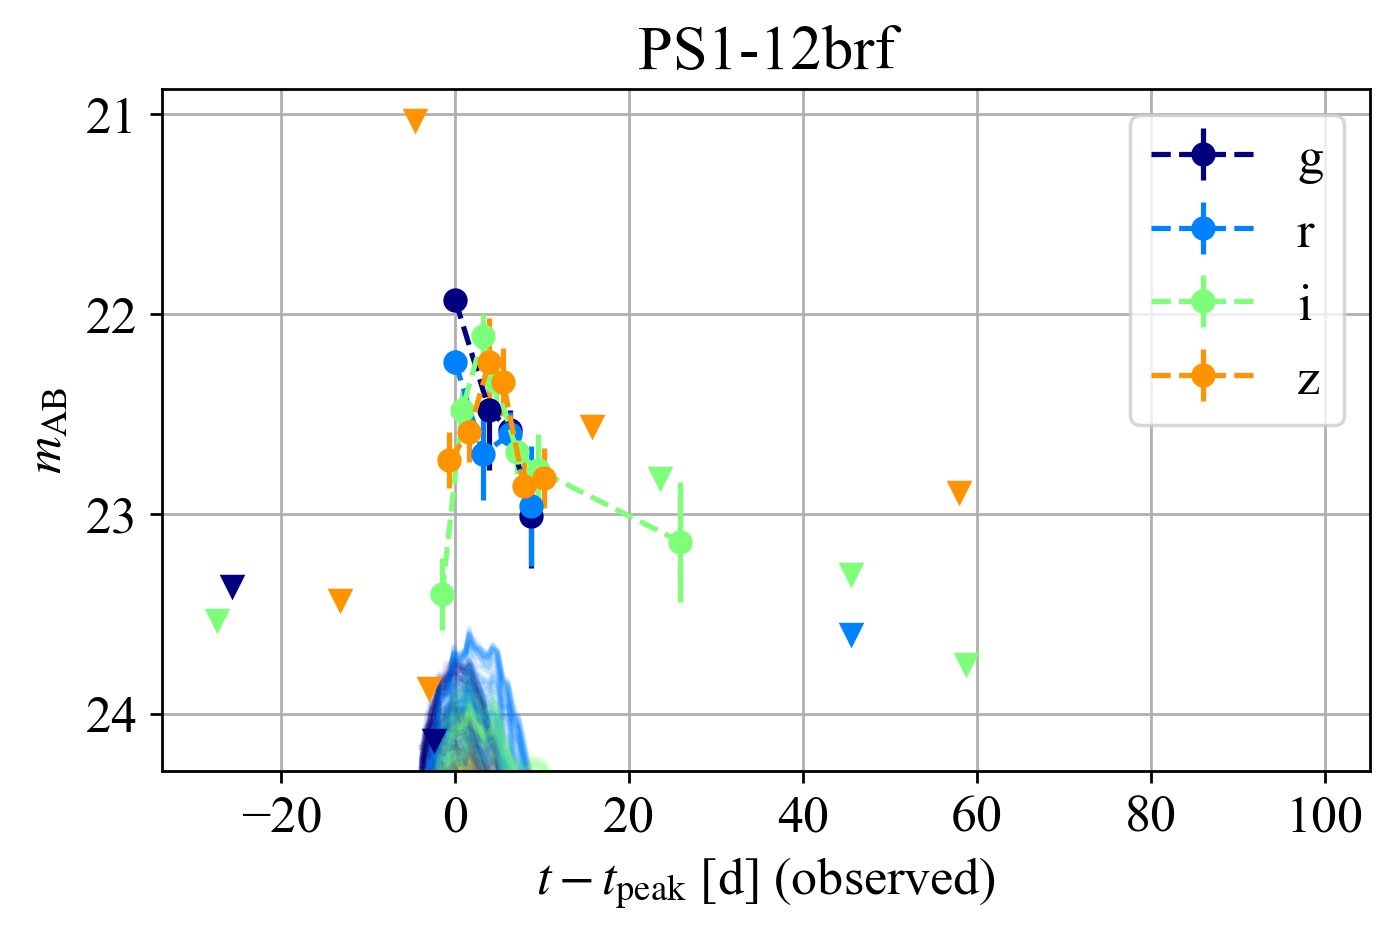

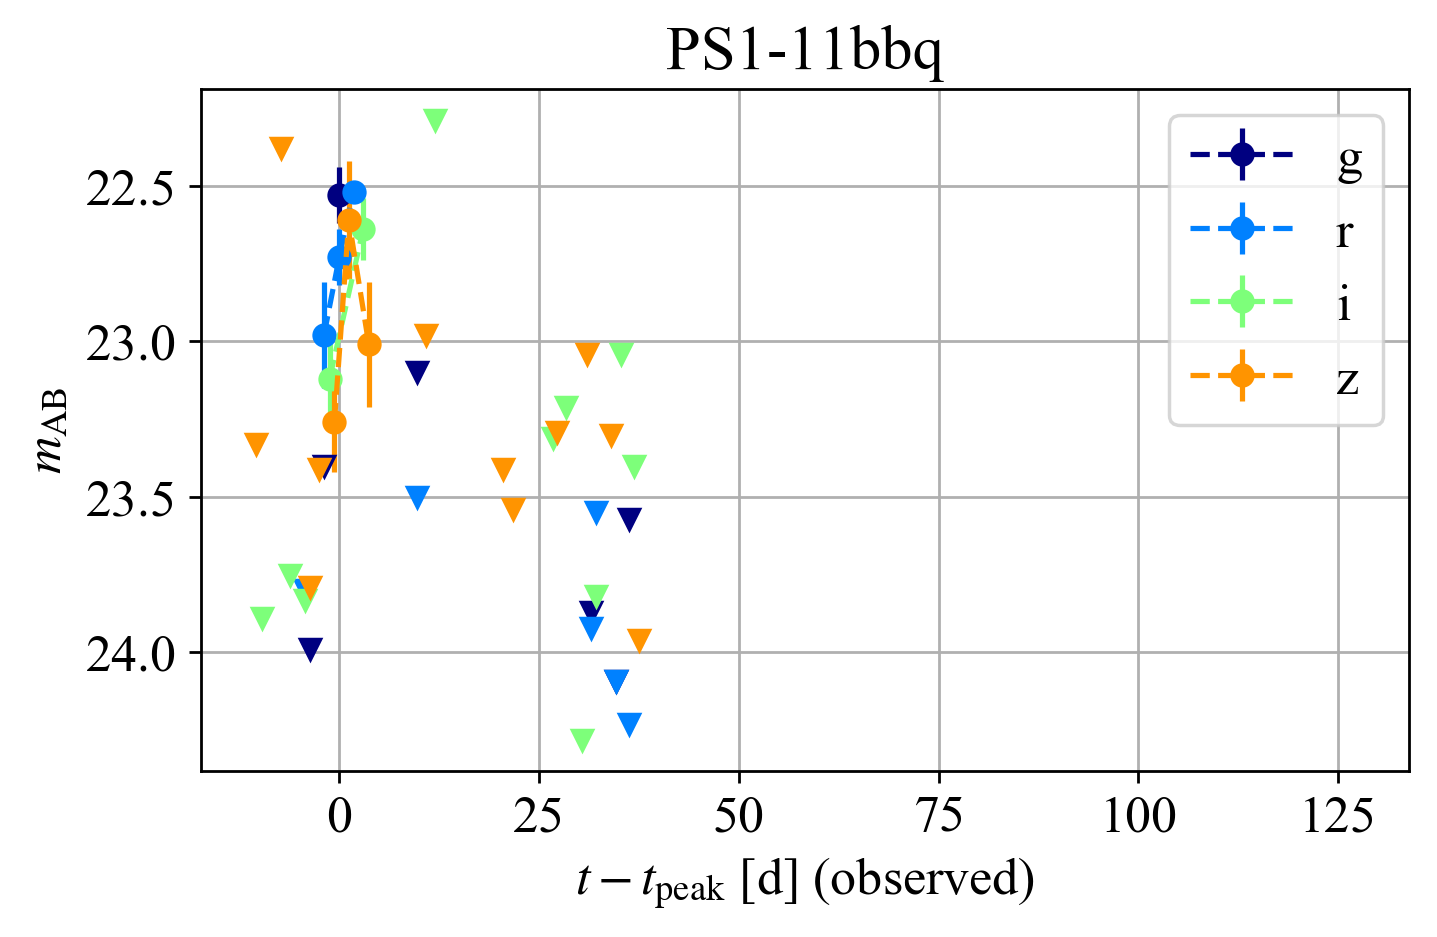

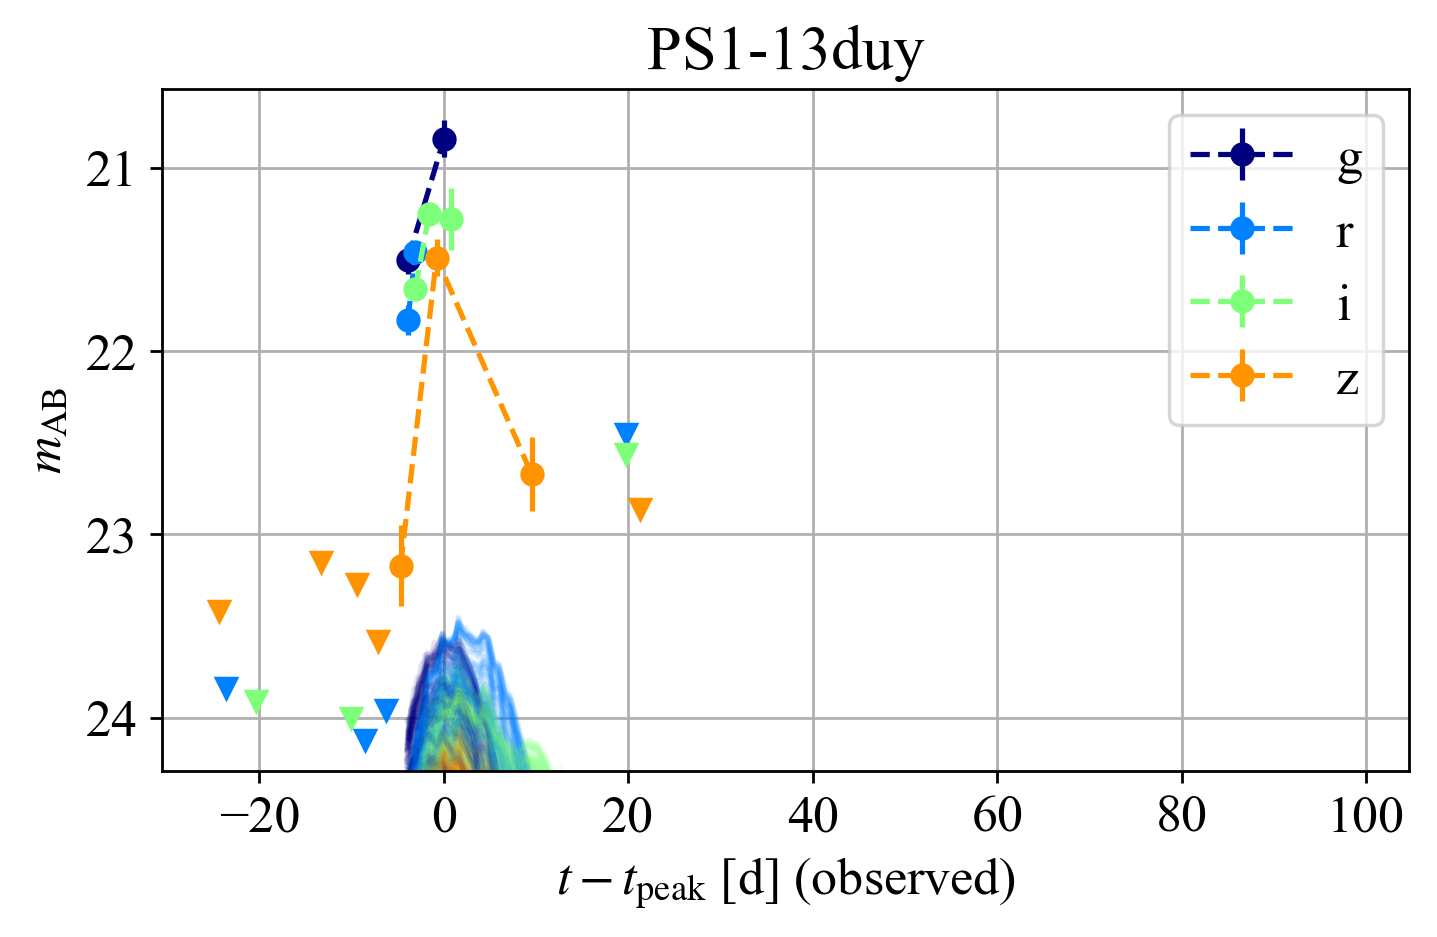

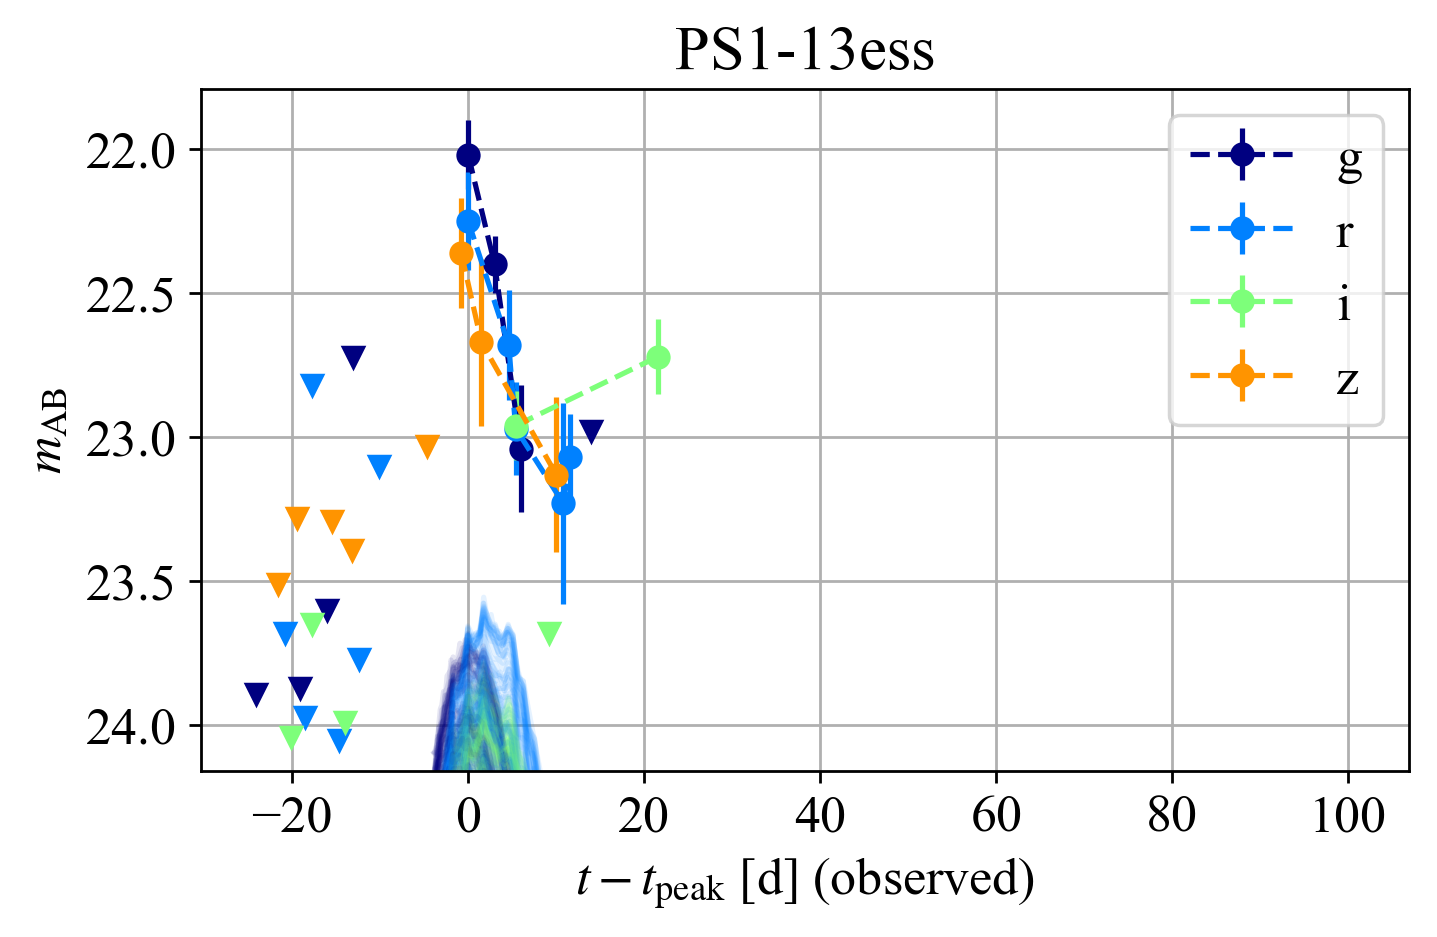

In [32]:
ckeys = {"alpha": 0.1}
# tname = "PS1-13ess"
for i, tname in enumerate(df_catalog_head["name"]):
#     print(i, tname)
    if (i!=8):
        fig = plt.figure(figsize=(6,4))
        ax = plt.axes()
        # ax.errorbar(np.arange(3), np.arange(1,4), yerr = np.append([np.nan], np.linspace(0.2, 0.4, 2)), fmt="v")
        transient, fig, ax = plot_panstarrs(fig, ax, tname, df_catalog_head, df_lc)
        ymin, ymax= ax.get_ylim()


        lc = calc_model_lc(spectra_hewd[9:], transient, filter_ps)
        fig, ax = plot_model(fig, ax, lc, time_shift=7, **ckeys)

        plt.ylim(ymin, ymax)
        plt.title("{:}".format(transient.name))
    #         plt.title(r"{:},  $z = {:.2f}$, $d_L = {:.1f}$ Mpc".format(transient.name, transient.redshift, transient.luminosity_distance))
        plt.xlabel(r"$t - t_{\rm{peak}}$ [d] (observed)")
        plt.ylabel(r"$m_{\rm{AB}}$")
        plt.grid()
        plt.gca().invert_yaxis()
        plt.legend()
        fig.tight_layout()
#         plt.savefig("figs/obs/rapid/Drout_2014/{}.png".format(tname))
        plt.show()
        plt.close()

# open supernovae

In [17]:
__, filter_john, filter_ps, __, __ = photontools.read_all_filters()

./photontools/filter_data/focas
./photontools/filter_data/johnson
./photontools/filter_data/panstarrs
./photontools/filter_data/swift
./photontools/filter_data/twomass


In [18]:
dir_ca_rich = "../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/"

# fpaths_ca_rich = subprocess.getoutput('find {} -name "*.json" | sort'.format(dir_ca_rich)).split("\n")
# golden_samples = np.array(["SN2005E", "SN2007ke", "SN2010et", "SN2012hn", "SN2016hgs", PTF11bij", "PTF11kmb", "PTF12bho"])
golden_samples = np.array(["SN2005E", "SN2007ke", "SN2010et", "SN2012hn", "SN2016hgs", "PTF09dav", "PTF11bij", "PTF11kmb"])
fpaths_ca_rich = [[]] * len(golden_samples)
for i, name_ in enumerate(golden_samples):
    fpaths_ca_rich[i] = dir_ca_rich + name_ + ".json"
fpaths_ca_rich = np.array(fpaths_ca_rich)


dir_dotIa = "../../0002_WD_TDE_radiation_transfer/catalog/dotIa/"

# fpaths_dotIa = subprocess.getoutput('find {} -name "*.json" | sort'.format(dir_dotIa)).split("\n")
# golden_samples = np.array(["SN2005E", "SN2007ke", "SN2010et", "SN2012hn", "SN2016hgs", PTF11bij", "PTF11kmb", "PTF12bho"])
golden_samples = np.array(["SN2010X"])
fpaths_dotIa = [[]] * len(golden_samples)
for i, name_ in enumerate(golden_samples):
    fpaths_dotIa[i] = dir_dotIa + name_ + ".json"
fpaths_dotIa = np.array(fpaths_dotIa)

dir_Iax = "../../0002_WD_TDE_radiation_transfer/catalog/Iax/"

fpaths_Iax = subprocess.getoutput('find {} -name "*.json" | sort'.format(dir_Iax)).split("\n")
# golden_samples = np.array(["SN2005E", "SN2007ke", "SN2010et", "SN2012hn", "SN2016hgs", PTF11bij", "PTF11kmb", "PTF12bho"])
# golden_samples = np.array(["SN2010X"])
# fpaths_Iax = [[]] * len(golden_samples)
# for i, name_ in enumerate(golden_samples):
#     fpaths_Iax[i] = dir_Iax + name_ + ".json"
# fpaths_Iax = np.array(fpaths_Iax)



In [19]:
def read_one_json(fpath):
    with open(fpath) as f:
        transient = Transient()
        json_dict = json.load(f)
        transient.name = list(json_dict.keys())[0]
        transient.Eb_v = np.float(json_dict[transient.name]["ebv"][0]["value"])
        transient.maxdate = astropy.time.Time(json_dict[transient.name]["maxdate"][0]["value"].replace("/", "-")).mjd

        if (json_dict[transient.name]["lumdist"][0]["u_value"] == "Mpc"):
            transient.luminosity_distance = np.float(json_dict[transient.name]["lumdist"][0]["value"]) * u.Mpc
        else:
            raise ValueError ("lumdist units {} is not supported yet!".format(json_dict[transient.name]["lumdist"]["u_value"]))
        transient.redshift = np.float(json_dict[transient.name]["redshift"][0]["value"])

        # for check E_B-V
        display(json_dict[transient.name]["ebv"])

        transient.spectra = json_dict[transient.name]["spectra"]

        lc = pd.DataFrame(json_dict[transient.name]["photometry"])
        lc["band"].replace(np.nan, "blank", inplace=True)
        transient.bands = np.sort([np.unicode(b) for b in np.unique(lc["band"])])
        transient.data = [[]] * transient.bands.size
        for i, band in enumerate(transient.bands):
            transient.data[i] = lc[lc["band"] == band]
            transient.data[i] = transient.data[i].sort_values("time")
            transient.data[i] = transient.data[i].reset_index(drop=True)
        transient.Nphoton = len(json_dict[transient.name]["photometry"])
        return transient

def read_all_json(dpath):
    fpaths = subprocess.getoutput('find {} -name "*.json" | sort').split("\n")
    transients = [[]] * len(fpaths)
    for i, fpath in enumerate(fpaths):
        transients[i] = read_one_json(fpath)
    
    return transients




In [20]:
def plot_model2(fig, ax, lc_model, transient, time_shift = 0., use_mosfit_color=False, **keys):
    
    def find_bands_duplicated(lc_model, transient):
        """Todo: modify not only [0] but e.g. Swift band"""
        bands_all = pd.Series(np.append([band[0] for band in lc_model.bands], 
                                        [band.replace("'", "") for band in transient.bands]))
        return bands_all[bands_all.duplicated()].to_numpy()
    
    bands_duplicated = find_bands_duplicated(lc_model, transient)
    print(bands_duplicated)
    
    for i, theta in enumerate(lc_model.thetas):
        for j, phi in enumerate(lc_model.phis):
            for k, band in enumerate(lc_model.bands):
                band = band[0]
                if band in bands_duplicated:
                    if not (use_mosfit_color):
                        ax.plot(transient.maxdate - time_shift + (lc_model.times) * lc_model.Doppler_shift_intrinsic[i,j], lc_model.data[:,i,j,k], color=dict_color[band], **keys)
                    else:
                        ax.plot(transient.maxdate - time_shift + (lc_model.times) * lc_model.Doppler_shift_intrinsic[i,j], lc_model.data[:,i,j,k], color=bandcolorf(band), **keys)
    return fig, ax


In [21]:
def plot_one_astrocats(fig, ax, fpath_json, use_mosfit_color=False, dict_color=None):

#     sns.reset_orig()
    with open(fpath, 'r', encoding = 'utf-8') as f:
        data = json.loads(f.read())
        if 'name' not in data:
            data = data[list(data.keys())[0]]

    photo = data['photometry']

    real_data = len([x for x in photo if 'band' in x and 'magnitude' in x and (
        'realization' not in x or 'simulated' in x)]) > 0

    band_attr = ['band', 'instrument', 'telescope', 'system', 'bandset']
    band_list = list(set([tuple(x.get(y, '')
                                for y in band_attr) for x in photo
                                if 'band' in x and 'magnitude' in x]))
    real_band_list = list(set([tuple(x.get(y, '')
                                     for y in band_attr) for x in photo
                                     if 'band' in x and 'magnitude' in x and (
                                         'realization' not in x or 'simulated' in x)]))
    xray_instrument_attr = ['instrument', 'telescope']
    xray_instrument_list = list(set([tuple(x.get(y, '')
                                for y in xray_instrument_attr) for x in photo
                                if 'instrument' in x and 'countrate' in x])) 
    real_band_list = list(set([tuple(x.get(y, '')
                                     for y in band_attr) for x in photo
                                     if 'band' in x and 'magnitude' in x and (
                                         'realization' not in x or 'simulated' in x)]))
    real_xray_instrument_list = list(set([tuple(x.get(y, '')
                                     for y in xray_instrument_attr) for x in photo
                                     if 'instrument' in x and 'countrate' in x and (
                                         'realization' not in x or 'simulated' in x)]))

    # Uncomment line below to only plot from the specified instruments.
    # inst_exclusive_list = ['UVOT']

#     fig = plt.figure(figsize=(12,8))
#     ax.invert_yaxis()
    # ax.set_xlim(55700,55820)
    # ax.set_ylim(bottom=25, top=19)
    ax.set_xlabel('MJD')
    ax.set_ylabel('Apparent Magnitude')
    used_bands = []
    for full_band in tqdm_notebook(band_list, desc='Photo', leave=False):
        (band, inst, tele, syst, bset) = full_band
        try:
            inst_exclusive_list
        except:
            pass
        else:
            if inst not in inst_exclusive_list:
                continue
        extra_nice = ', '.join(list(filter(None, OrderedDict.fromkeys((inst, syst, bset)).keys())))
#         nice_name = band + ((' [' + extra_nice + ']') if extra_nice else '')
        nice_name = band

    #     realizations = [[] for x in range(len(model['realizations']))]
        for ph in photo:
            rn = ph.get('realization', None)
            si = ph.get('simulated', False)
            if rn and not si:
                if tuple(ph.get(y, '') for y in band_attr) == full_band:
                    realizations[int(rn) - 1].append((
                        float(ph['time']), float(ph['magnitude']), [
                            float(ph.get('e_lower_magnitude', ph.get('e_magnitude', 0.0))),
                            float(ph.get('e_upper_magnitude', ph.get('e_magnitude', 0.0)))],
                    ph.get('upperlimit')))
    #     numrz = np.sum([1 for x in realizations if len(x)])
    #     for rz in realizations:
    #         if not len(rz):
    #             continue
    #         xs, ys, vs, us = zip(*rz)
    #         label = '' if full_band in used_bands or full_band in real_band_list else nice_name
    #         if max(vs) == 0.0:
    #             plt.plot(xs, ys, color=bandcolorf(band),
    #                              label=label, linewidth=0.5)
    #         else:
    #             xs = np.array(xs)
    #             ymi = np.array(ys) - np.array([np.inf if u else v[0] for v, u in zip(vs, us)])
    #             yma = np.array(ys) + np.array([v[1] for v in vs])
    #             plt.fill_between(xs, ymi, yma, color=bandcolorf(band), edgecolor=None,
    #                              label=label, alpha=1.0/numrz, linewidth=0.0)
    #             plt.plot(xs, ys, color=bandcolorf(band), 
    #                              label=label, alpha=1.0, linewidth=0.5)
    #         if label:
    #             used_bands = list(set(used_bands + [full_band]))
        if real_data:
            for s in range(2):
                if s == 0:
                    cond = False
                    symb = 'o'
                else:
                    cond = True
                    symb = 'v'
                vec = [(float(x['time']), float(x['magnitude']),
                        0.0 if 'upperlimit' in x else float(x.get('e_lower_magnitude', x.get('e_magnitude', 0.0))),
                        float(x.get('e_upper_magnitude', x.get('e_magnitude', 0.0)))) for x in photo
                       if 'magnitude' in x and ('realization' not in x or 'simulated' in x) and
                       'host' not in x and 'includeshost' not in x and
                       x.get('upperlimit', False) == cond and
                       tuple(x.get(y, '') for y in band_attr) == full_band]
                if not len(vec):
                    continue
                xs, ys, yls, yus = zip(*vec)
#                 label = nice_name if full_band not in used_bands else ''
                label = nice_name.replace("'", "") if band not in used_bands else ''
                if(use_mosfit_color):
                    color = bandcolorf(band)
                else:
                    color = dict_color[band.replace("'", "")]
                plt.errorbar(xs, ys, yerr=(yus, yls), color=color, fmt=symb,
                             label=label,
                             markeredgecolor='black', markeredgewidth=1, capsize=1,
                             elinewidth=1.5, capthick=2, zorder=10)
                plt.errorbar(xs, ys, yerr=(yus, yls), color='k', fmt=symb, capsize=2,
                             elinewidth=2.5, capthick=3, zorder=5)
                if label:
                    used_bands = list(set(used_bands + [band]))
#                     used_bands = list(set(used_bands + [full_band]))
#     plt.margins(0.02, 0.1)
#     plt.grid()
#     plt.title(fpath.split("/")[-1][:-5])
#     plt.show()
#     plt.close()
    # fig.savefig('../products/lc.pdf')
    
    

In [22]:
bands_ = np.append([band[0] for band in filter_john.bands], filter_ps.bands)
lambdas_ = np.append(filter_john.effective_wavelength, filter_ps.effective_wavelength)

bands_from_blue = bands_[np.argsort(lambdas_)]
bands_from_blue = bands_from_blue[[1, 2, 3, 4, 5, 6, 7, 8]]
color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
# color_from_blue = np.array([plt.cm.nipy_spectral(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
# color_from_blue = np.array([plt.cm.viridis(i/bands_from_blue.size) for i in range(1, bands_from_blue.size+1)])
dict_color = dict(zip(bands_from_blue, color_from_blue))
dict_lambdas = dict(zip(bands_from_blue, lambdas_[np.argsort(lambdas_)]))

# To compare with obs

In [24]:
def give_lines():
    lines_CaII = np.array([3933.66, 3968.47, 8498.02, 8542.09, 8662.14])
    lines_SII = np.array([5432.80, 5453.85, 5473.61, 5606.15, 5640.35])
    lines_SiII = np.array([5957.56, 5978.93, 6347.11, 6371.37])
    lines_HeII = np.array([3203, 4686, 6560])
    lines_HeI = np.array([5876, 7065])
    line_names = ["Ca II", "S II", "Si II", "He II", "He I"]
#     print(np.array(line_names[3] * lines_HeII.size)
    line_names = np.concatenate([np.array([line_names[0]] * lines_CaII.size), 
                                 np.array([line_names[1]] * lines_SII.size), 
                                 np.array([line_names[2]] * lines_SiII.size), 
                                 np.array([line_names[3]] * lines_HeII.size), 
                                 np.array([line_names[4]] * lines_HeI.size)])
    lines_lambda = np.concatenate([lines_CaII, lines_SII, lines_SiII, lines_HeII, lines_HeI])
    return line_names, lines_lambda

def plot_one_line(fig, ax, x, y, name=None, ymin=None, ymax=None, show_label=False, **keys):
    color_dict={"None": "black", "Si": "C0", "S": "C1", "Ca":"C2", "He":"C3"}
    exclude_lines_show_name = np.array([3933.66, 8498.02, 8662.14, 5432.80, 5473.61, 5606.15, 5957.56, 6347.11])
    show_elements = np.array(["Si", "S", "Ca", "He"])
    if name is None:
        element = "None"
    else:
        element = name.split(" ")[0].split("[")[0]

    if ymin is None:
        ymin = ax.get_ylim()[0]
    if ymax is None:
        ymax = ax.get_ylim()[1]

    if (show_label):
        label=name
    else:
        label=""
    if (np.sum(element == show_elements) > 0):
        ax.vlines(x, ymin, ymax, color=color_dict[element], label=label, **keys)
#         if (np.sum(x == exclude_lines_show_name) == 0):
#             print(x, name, x == exclude_lines_show_name)
#             ax.annotate(name ,xy=(x, y), ha="center", backgroundcolor='white', color=color_dict[element])
#         ax.annotate(name ,xy=(x, 0.92 * ax.get_ylim()[1]), color='Black', ha="center")


In [24]:
mycolor=plt.cm.jet
i_time=0
# i_time_ed = -25
i_time_ed = -1
# i_time=64
# i_time_ed = 66
j_theta=5
j_theta_ed=15
k_phi=9
k_phi_ed=11
every_time = 3

offset2_ = 80
offset_ = 1
spectra_ = spectra_hewd2[i_time:i_time_ed,j_theta:j_theta_ed,:]


fig=plt.figure()
ax = plt.gca()

# for i_time in np.arange(0, spectra_.times.size, every_time):
#     i_time_ed = i_time + every_time
# #     offset_ = 0
#     data_ = spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2))
#     data_ = data_ / data_.mean()
#     plt.plot(spectra_.wavelengths, (offset2_ - offset_ * i_time + data_), 
#              alpha=0.7, linewidth=0.5, color=mycolor(i_time / spectra_.times.size))
# #     plt.plot(spectra_.wavelengths, + - offset_ * i_time + spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
# #              alpha=0.7, color=spectra_.times[i_time:i_time_ed].mean())
#     print(i_time / spectra_.times.size, spectra_.times[i_time:i_time_ed].mean())

# for k_phi in range(spectra_.phis.size):
#     k_phi_ed = k_phi + 1
#     plt.plot(spectra_.wavelengths, spectra_.data[:,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=mycolor(k_phi / spectra_.phis.size))
# plt.plot(spectra_.wavelengths, spectra_.data[:,:,:].mean(axis=(0,1,2)), 
#          alpha=0.7, color=mycolor(k_phi / spectra_.phis.size))


# fig = plt.figure(figsize)
for i in range(len(transient.spectra)):
    day_after_peak_ = 15+(float(transient.spectra[i]["time"]) - transient.maxdate)
    nearest_i_time = np.argmin(np.abs(spectra_.times - day_after_peak_))
    spectra_2 = photontools.Spectra()
    spectra_2data = np.array(transient.spectra[i]["data"], dtype=float)
    spectra_2.wavelengths = spectra_2data[:,0]
    print(i, day_after_peak_, nearest_i_time, spectra_2.wavelengths.size)
    spectra_2.data = spectra_2data[:,1] / spectra_2data[:,1].mean()
    spectra_2.times, spectra_2.thetas, spectra_2.phis = (np.array([day_after_peak_]), np.array([0]), np.array([0]))
#     dict_ = {"0": 6, "1": 3, "2": 1, "3": 2, "4" :1, "5":4, "6":1}
#     spectra_2 = spectra_2.binning(every_wavelength = dict_[str(i)])
    spectra_2.redshift(z=transient.redshift)
#     if (i==5):
#         spectra_2.data *= 0.01
    plt.plot(spectra_2.wavelengths, (offset2_ - offset_ * nearest_i_time) + spectra_2.data, 
             alpha=0.7, linewidth=0.5, ls=lss[2], color=mycolor(nearest_i_time / spectra_.times.size), label=r"tpeak={:0d} d".format(int(day_after_peak_)))


lines_name, lines_lambda = give_lines()
for i in range(lines_lambda.size):
    line_lambda = lines_lambda[i]
    line_name = lines_name[i]
#     if (i in [0, 5, 10]):
#         plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=True,**keys_line)
#     else:
    plot_one_line(fig, ax, line_lambda, 90, line_name, ymin=0, ymax=100, linewidth=0.5, show_label=False)


    
y_annot=1.02
ax.annotate("Si II" ,xy=(6200, y_annot), ha="center", backgroundcolor='white', color="C0")
ax.annotate("S II" ,xy=(5500, y_annot), ha="center", backgroundcolor='white', color="C1")
ax.annotate("Ca II" ,xy=(8500, y_annot), ha="center", backgroundcolor='white', color="C2")
ax.annotate("Ca II" ,xy=(3950, y_annot), ha="center", backgroundcolor='white', color="C2")
ax.annotate("He II" ,xy=(4686, y_annot), ha="center", backgroundcolor='white', color="C3")
ax.annotate("He II" ,xy=(3203, y_annot), ha="center", backgroundcolor='white', color="C3")
ax.annotate("He II" ,xy=(4686, y_annot), ha="center", backgroundcolor='white', color="C3")
ax.annotate("He I" ,xy=(5876, y_annot), ha="center", backgroundcolor='white', color="C3")
ax.annotate("He I" ,xy=(7065, y_annot), ha="center", backgroundcolor='white', color="C3")
# ax.annotate("He I" ,xy=(6560, y_annot), ha="center", backgroundcolor='white', color="C3")



# create a colorbar
# sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=spectra_.times.min(), vmax=spectra_.times.max()))
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=colors.LogNorm(vmin=spectra_.times.min(), vmax=spectra_.times.max()))
sm._A = []
cb = plt.colorbar(sm,label=r'time [d]',orientation='vertical',shrink=1.0)
# cb = plt.colorbar(sm,label=r'Azimuthal Angle $\phi$ ',orientation='vertical',shrink=1.0)





# myticks = np.arange(2.,25, 2.)
# # myticks = np.linspace(0.,2.,9)*np.pi
# mylabel = [r"${:d}$".format(int(i)) for i in np.arange(2.,22, 2.)]
# mylabel.append("")
# mylabel.append(r"$24$")
# # mylabel = [r"$0$","",r"$\frac{\pi}{2}$","",r"$\pi$","",r"$\frac{3 \pi}{2}$","",r"$2 \pi$"]
# cb.set_ticks(myticks)
# cb.set_ticklabels(mylabel)

# plt.title(r"w/o Doppler shift, $t = {:.1f}$ d, $\cos\,\theta = {:.1f}$".format(spectra_.times.mean(), np.abs(np.cos(spectra_.thetas[:-1].mean()))))
# plt.title(r"w/o Doppler shift, mean over all the angle")
# plt.title(r"$t = {:.0f}$ d, $\theta = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean()))
# plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_.times[i_time:i_time_ed].mean(), spectra_.thetas[j_theta:j_theta_ed].mean(), spectra_.phis[k_phi:k_phi_ed].mean()))
plt.legend()
plt.xlabel(r"Rest Wavelength [$\AA$]")
plt.ylabel(r"flux + offset [arbitrary units]")
# plt.ylabel(r"flux + offset [$10^{39}$ erg/s/$\AA$]")
plt.xlim(3000, 11000)

plt.grid()
# plt.savefig("figs/hewd/spectra_t{:.0f}.png".format(spectra_.times[i_time:i_time_ed].mean()))
# plt.savefig("figs/hewd/spectra_wo_Doppler_shift_all_angle.pdf", dpi=300)
# plt.show()



NameError: name 'spectra_hewd2' is not defined

In [34]:
# %matplotlib notebook
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
# plt.rcParams["figure.dpi"] = 150


0


[{'value': '0.069', 'derived': True, 'e_value': '0.0042', 'source': '4,10'}]

['I' 'R' 'V']


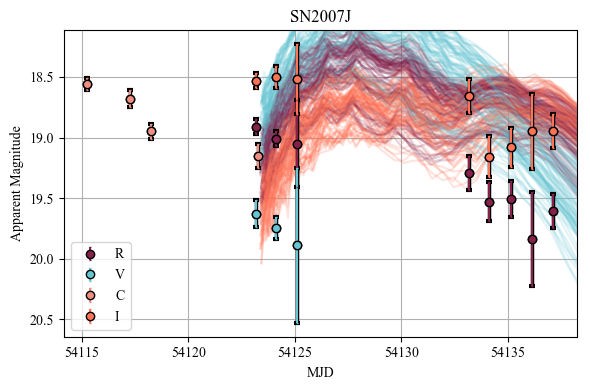

In [35]:
system_="AB"
ckeys = {"alpha": 0.2}
# flag_use_mosfit_color = False
flag_use_mosfit_color = True

# for i ,fpath in enumerate(fpaths_ca_rich):
# for i ,fpath in enumerate(fpaths_dotIa):
for i ,fpath in enumerate(fpaths_Iax):
    if (i == 0):
#     if (i != 3):
#     if (True):
        print(i)
        tstart = t()

        # read transient json file
        transient = read_one_json(fpath)
        lc_johnson = calc_model_lc(spectra_, transient, filter_john)
        lc_ps = calc_model_lc(spectra_, transient, filter_ps)
        lc_model = lc_johnson.append_band(lc_ps)

        # plotter
#         fig = plt.figure(figsize = (9, 6))
        fig = plt.figure()
        ax = plt.gca()

        plot_one_astrocats(fig, ax, fpath, use_mosfit_color=flag_use_mosfit_color, dict_color=dict_color)
        if not (flag_use_mosfit_color):
            handles, labels = ax.get_legend_handles_labels()
            sort_index = np.argsort(np.array([dict_lambdas[label] for label in labels]))
            handles_new = [[]] * sort_index.size
            labels_new  = [[]] * sort_index.size
            for j in range(sort_index.size):
                handles_new[j] = handles[sort_index[j]]
                labels_new[j]  = labels[sort_index[j]]
            ax.legend(handles_new, labels_new)
        ax.legend(loc="best")

        xlims = ax.get_xlim()
        ylims = ax.get_ylim()
        
#         time_shift = 0.
        time_shift = 3.
#         xlims = [53384, 53401]
#         xlims = [57680, 57720]
#         ylims = [17.5, 21.5]
        
        plot_model2(fig, ax, lc_model, transient, time_shift=time_shift, use_mosfit_color=flag_use_mosfit_color, **ckeys)

        plt.xlim(xlims[0], xlims[1])
        plt.ylim(ylims[0], ylims[1])
        ax.invert_yaxis()
        plt.grid()
        plt.title(transient.name)
        
        fig.tight_layout() 
#         plt.savefig("figs/obs/ca-rich/{}_tshift_{:.1f}d.png".format(transient.name, time_shift), transparent=True)
#         plt.savefig("figs/obs/dotIa/{}_tshift_{:.1f}d.pdf".format(transient.name, time_shift), dpi=300, transparent=True)
        plt.show()
        plt.close()


In [38]:
fpaths_ca_rich

array(['../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2005E.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2007ke.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2010et.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2012hn.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2016hgs.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/PTF09dav.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/PTF11bij.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/PTF11kmb.json'],
      dtype='<U78')

In [50]:
band_ = []
for i, fpath in enumerate(fpaths_ca_rich):
    if (True):
        with open(fpath, "r") as f:
            json_ = json.load(f)
            name = list(json_.keys())[0]
            print(i, name, len(json_[name]["spectra"]))
        
for i, fpath in enumerate(fpaths_ca_rich):
    if (i==2):
        transient = read_one_json(fpath)
#         json_ = json.load(f)
#         name = list(json_.keys())[0]
#         print(i, name, len(json_[name]["spectra"]))
#     #         print(phot.columns)
#             display(phot)
#             if ("band" in phot.columns):
#                 band_ = np.append(band_, np.unique(phot["band"].replace(np.nan, "Blank")))
#                 display(np.unique(phot["band"].replace(np.nan, "Blank")))
#     #             for j, pho in enumerate(phot):
#     #                 print("j=", j, pho.keys())

0 SN2005E 5
1 SN2007ke 2
2 SN2010et 7
3 SN2012hn 9
4 SN2016hgs 1
5 PTF09dav 5
6 PTF11bij 1
7 PTF11kmb 3


[{'value': '0.0366', 'derived': True, 'e_value': '0.0009', 'source': '6,11'}]

In [327]:
@jit
def binning_spectra_in_wavelength(spectra:photontools.Spectra, wavelength_bin_sep=1):
    new_spectra = photontools.Spectra()
    wavelengths_with_edge = np.append(np.arange(wavelength_bin_sep * np.int(np.min(spectra.wavelengths) / wavelength_bin_sep),
                                        wavelength_bin_sep * np.int(np.max(spectra.wavelengths) / wavelength_bin_sep),
                                        wavelength_bin_sep
                                       ), wavelength_bin_sep * np.int(np.max(spectra.wavelengths) / wavelength_bin_sep))
    wavelengths_center = 0.5 * (wavelengths_with_edge[1:] + wavelengths_with_edge[:-1])
    weight = np.zeros((wavelengths_center.size, spectra.wavelengths.size-1), dtype=float)
    new_data = np.zeros(wavelengths_center.size, dtype=float)
    for i in range(wavelengths_center.size):
        for j in range(spectra.wavelengths.size-1):
            weight[i, j] = np.max([0, np.min([wavelengths_with_edge[i+1], spectra.wavelengths[j+1]])
                                 - np.max([wavelengths_with_edge[i], spectra.wavelengths[j]])])
    new_data = np.sum(spectra.data[:,:,:,:-1] * weight, axis=(-1))
    new_spectra.wavelengths = wavelengths_center
    new_spectra.data = new_data[0,0] / wavelength_bin_sep
    return new_spectra
#     new_spectra.wavelengths = np.exp(np.log(spectra.wavelengths.reshape(N_wavelength_bins, every_wavelength)).mean(axis=1))
#     last_wavelength  = np.exp(np.log(spectra.wavelengths[-1]) + np.diff(np.log(spectra.wavelengths))[-2])
#     wavelength_delta = np.diff(np.append(spectra.wavelengths, last_wavelength))

#     data = data.reshape(N_time_bins,
#                         N_theta_bins, 
#                         N_phi_bins, 
#                         N_wavelength_bins,
#                         every_wavelength
#                        )
#     # weighted mean of data for wavelength & time
#     data = np.sum(data * wavelength_delta.reshape(N_wavelength_bins, every_wavelength), axis=-1) / wavelength_delta.reshape(N_wavelength_bins, every_wavelength).sum(axis=1)


In [503]:
%time spectra_hewd = photontools.read_Maeda_data(filepath_hewd)

%time spectra_hewd = spectra_hewd.binning(N_theta_bins=20, N_phi_bins=20)

%time spectra_hewd = spectra_hewd.Doppler_shift_by_intrinsic_velocity(vel_hewd)


CPU times: user 7.29 s, sys: 12.8 s, total: 20.1 s
Wall time: 23.5 s
CPU times: user 7.29 s, sys: 4.08 s, total: 11.4 s
Wall time: 12 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 5.97 s, sys: 461 ms, total: 6.43 s
Wall time: 6.55 s


theta/pi [0.43590579 0.46811573 0.50000001 0.53188429 0.56409423]
phi/pi [0.8 0.9 1. ]
7.246279931922903
12.02583116648199
13.186061637400897
36.317428623293594
0 4.459113300492611
1 5.444334975369458
2 19.237438423645322
3 31.060098522167493


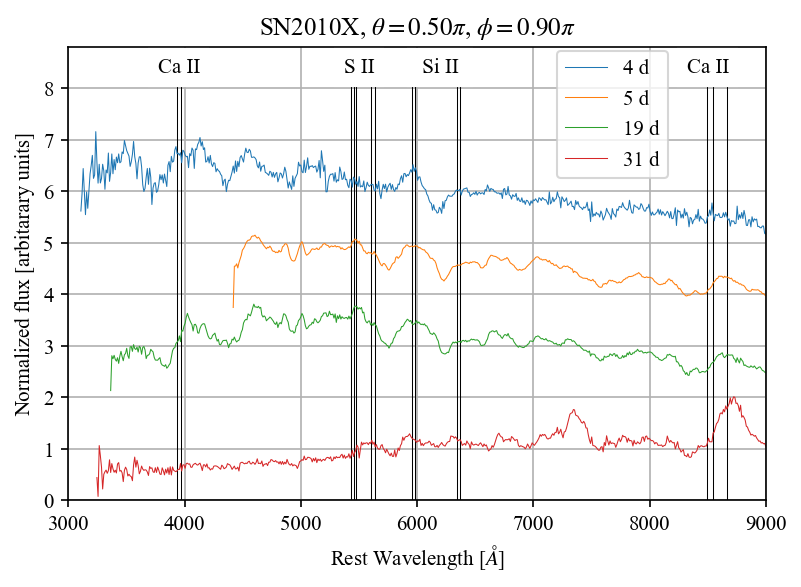

In [505]:
i_time=9
# i_time_ed = -25
i_time_ed = -1
# i_time=64
# i_time_ed = 66
j_theta=8
j_theta_ed=12
k_phi=8
k_phi_ed=10
every_time = 2


spectra_ = spectra_hewd[i_time:i_time_ed,j_theta:j_theta_ed,k_phi:k_phi_ed]

print("theta/pi", spectra_hewd.thetas[j_theta-1:j_theta_ed] / np.pi)
print("phi/pi", spectra_hewd.phis[k_phi-1:k_phi_ed] / np.pi)

# fig=plt.figure(figsize=(6,6))
fig=plt.figure(figsize=(6,4))
ax = plt.gca()


i_time_arr = np.array([23, 34, 36, 58])
for i, i_time in enumerate(i_time_arr):
    i_time_ed = i_time + every_time
    i_time_st = i_time - every_time
#     offset_ = 0
    data_ = spectra_.data[i_time_st:i_time_ed,:,:].mean(axis=(0,1,2))
    data_ = data_ / data_.mean()
    if (i == 0):
        data_ = data_/5
    if (i == 1):
        data_ = data_/10
    if (i == 2):
        data_ = data_/10
    if (i == 3):
        data_ = data_/20
    plt.plot(spectra_.wavelengths, (offset2_ - offset_ * i + data_), 
             alpha=1, linewidth=1.3, color="C{:1d}".format(i))
#     plt.plot(spectra_.wavelengths, + - offset_ * i_time + spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=spectra_.times[i_time:i_time_ed].mean())
    print(spectra_.times[i_time:i_time_ed].mean())




# fig = plt.figure(figsize)
offset_each = -1.5
total_offset= 5
# spectras = [[]] * len(transient.spectra)
for i in range((4)):
        day_after_peak_ = 8.4+(float(transient.spectra[i]["time"]) - transient.maxdate) / (1 + transient.redshift)
    #     day_after_peak_ = 15+(float(transient.spectra[i]["time"]) - transient.maxdate)
    #     spectra_ = photontools.Spectra()
    #     spectra_data = np.array(transient.spectra[i]["data"], dtype=float)
    #     spectra_.wavelengths = spectra_data[:,0]
        print(i, day_after_peak_)
    #     spectra_.data = spectra_data[:,1] / spectra_data[:,1].mean()
    #     spectra_.times, spectra_.thetas, spectra_.phis = (np.array([day_after_peak_]), np.array([0]), np.array([0]))
    # #     dict_ = {"0": 6, "1": 3, "2": 1, "3": 2, "4" :1, "5":4, "6":1}
    # #     spectra_ = spectra_.binning(every_wavelength = dict_[str(i)])
    #     spectra_.redshift(z=transient.redshift)
    #     spectra_.data = spectra_.data.reshape(1,1,1,spectra_.data.size)
    #     %time spectras[i] = binning_spectra_in_wavelength(spectra_, 10)
    # #     plt.plot(spectra_.wavelengths[1:], np.diff(spectra_.wavelengths))
        if(i!=3):
            plt.plot(spectras[i].wavelengths / (1+transient.redshift), spectras[i].data + offset_each * i + total_offset, 
                 alpha=1, linewidth=0.5, color="C{:1d}".format(i), label=r"{:0d} d".format(int(day_after_peak_)), ls=lss[0])
        else:
            plt.plot(spectras[i].wavelengths / (1+transient.redshift), spectras[i].data /2 + offset_each * i + total_offset, 
                 alpha=1, linewidth=0.5, color="C{:1d}".format(i), label=r"{:0d} d".format(int(day_after_peak_)), ls=lss[0])

keys_line ={"linewidth":0.5}

lines_name, lines_lambda = give_lines()
ymax_=8.3
for i in range(lines_lambda.size):
    line_lambda = lines_lambda[i]
    line_name = lines_name[i]
#     if (i in [0, 5, 10]):
#         plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=True,**keys_line)
#     else:
    plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=ymax_+0.1, show_label=False,**keys_line)

ax.annotate(" Si II " ,xy=(6200, ymax_), ha="center", backgroundcolor='white', color="black")
ax.annotate("S II" ,xy=(5500, ymax_), ha="center", backgroundcolor='white', color="black")
ax.annotate("Ca II" ,xy=(8500, ymax_), ha="center", backgroundcolor='white', color="black")
ax.annotate("Ca II" ,xy=(3950, ymax_), ha="center", backgroundcolor='white', color="black")


    
plt.xlim(3000,9000)
plt.ylim(0,8.8)
plt.grid()
plt.legend(loc=(0.7,0.71))
plt.xlabel(r"Rest Wavelength [$\AA$]")
plt.ylabel(r"Normalized flux [arbitarary units]")
plt.title(transient.name + r", $\theta = {:.2f}\pi$, $\phi = {:.2f}\pi$".format(spectra_hewd.thetas[j_theta-1:j_theta_ed].mean() / np.pi, spectra_hewd.phis[k_phi-1:k_phi_ed].mean() / np.pi))
# plt.savefig("figs/obs/ca-rich/SN2010et_spectra_comp_hewd.pdf", dpi=300, transparent=True)
plt.show()

In [510]:
transient = read_one_json(fpaths_dotIa[0])

[{'value': '0.1249', 'derived': True, 'e_value': '0.0032', 'source': '4,10'}]

theta/pi [0.43590579 0.46811573 0.50000001 0.53188429 0.56409423]
phi/pi [0.8 0.9 1. ]
7.246279931922903
12.02583116648199
13.186061637400897
36.317428623293594
0 4.459113300492611
1 5.444334975369458
2 19.237438423645322
3 31.060098522167493


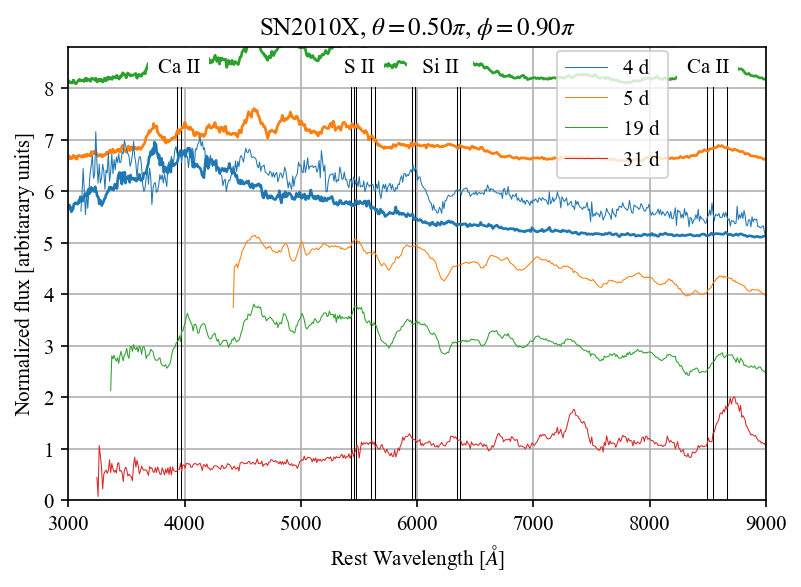

In [511]:
i_time=9
# i_time_ed = -25
i_time_ed = -1
# i_time=64
# i_time_ed = 66
j_theta=8
j_theta_ed=12
k_phi=8
k_phi_ed=10
every_time = 2


spectra_ = spectra_hewd[i_time:i_time_ed,j_theta:j_theta_ed,k_phi:k_phi_ed]

print("theta/pi", spectra_hewd.thetas[j_theta-1:j_theta_ed] / np.pi)
print("phi/pi", spectra_hewd.phis[k_phi-1:k_phi_ed] / np.pi)

# fig=plt.figure(figsize=(6,6))
fig=plt.figure(figsize=(6,4))
ax = plt.gca()

offset_each = -1.5
total_offset= 5

i_time_arr = np.array([23, 34, 36, 58])
for i, i_time in enumerate(i_time_arr):
    i_time_ed = i_time + every_time
    i_time_st = i_time - every_time
#     offset_ = 0
    data_ = spectra_.data[i_time_st:i_time_ed,:,:].mean(axis=(0,1,2))
    data_ = data_ / data_.mean()
    if (i == 0):
        data_ = data_/5
    if (i == 1):
        data_ = data_/10
    if (i == 2):
        data_ = data_/10
    if (i == 3):
        data_ = data_/20
    plt.plot(spectra_.wavelengths, (total_offset - offset_each * i + data_), 
             alpha=1, linewidth=1.3, color="C{:1d}".format(i))
#     plt.plot(spectra_.wavelengths, + - offset_ * i_time + spectra_.data[i_time:i_time_ed,:,k_phi:k_phi_ed].mean(axis=(0,1,2)), 
#              alpha=0.7, color=spectra_.times[i_time:i_time_ed].mean())
    print(spectra_.times[i_time:i_time_ed].mean())




# spectras = [[]] * len(transient.spectra)
if (transient.name == "SN2010et"):
    for i in range((4)):
        day_after_peak_ = 8.4+(float(transient.spectra[i]["time"]) - transient.maxdate) / (1 + transient.redshift)
    #     day_after_peak_ = 15+(float(transient.spectra[i]["time"]) - transient.maxdate)
    #     spectra_ = photontools.Spectra()
    #     spectra_data = np.array(transient.spectra[i]["data"], dtype=float)
    #     spectra_.wavelengths = spectra_data[:,0]
        print(i, day_after_peak_)
    #     spectra_.data = spectra_data[:,1] / spectra_data[:,1].mean()
    #     spectra_.times, spectra_.thetas, spectra_.phis = (np.array([day_after_peak_]), np.array([0]), np.array([0]))
    # #     dict_ = {"0": 6, "1": 3, "2": 1, "3": 2, "4" :1, "5":4, "6":1}
    # #     spectra_ = spectra_.binning(every_wavelength = dict_[str(i)])
    #     spectra_.redshift(z=transient.redshift)
    #     spectra_.data = spectra_.data.reshape(1,1,1,spectra_.data.size)
    #     %time spectras[i] = binning_spectra_in_wavelength(spectra_, 10)
    # #     plt.plot(spectra_.wavelengths[1:], np.diff(spectra_.wavelengths))
        if(i!=3):
            plt.plot(spectras[i].wavelengths / (1+transient.redshift), spectras[i].data + offset_each * i + total_offset, 
                 alpha=1, linewidth=0.5, color="C{:1d}".format(i), label=r"{:0d} d".format(int(day_after_peak_)), ls=lss[0])
        else:
            plt.plot(spectras[i].wavelengths / (1+transient.redshift), spectras[i].data /2 + offset_each * i + total_offset, 
                 alpha=1, linewidth=0.5, color="C{:1d}".format(i), label=r"{:0d} d".format(int(day_after_peak_)), ls=lss[0])
elif (transient.name == "SN2010X"):

keys_line ={"linewidth":0.5}

lines_name, lines_lambda = give_lines()
ymax_=8.3
for i in range(lines_lambda.size):
    line_lambda = lines_lambda[i]
    line_name = lines_name[i]
#     if (i in [0, 5, 10]):
#         plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=1, show_label=True,**keys_line)
#     else:
    plot_one_line(fig, ax, line_lambda, 1.02, line_name, ymin=0, ymax=ymax_+0.1, show_label=False,**keys_line)

ax.annotate(" Si II " ,xy=(6200, ymax_), ha="center", backgroundcolor='white', color="black")
ax.annotate("S II" ,xy=(5500, ymax_), ha="center", backgroundcolor='white', color="black")
ax.annotate("Ca II" ,xy=(8500, ymax_), ha="center", backgroundcolor='white', color="black")
ax.annotate("Ca II" ,xy=(3950, ymax_), ha="center", backgroundcolor='white', color="black")


    
plt.xlim(3000,9000)
plt.ylim(0,8.8)
plt.grid()
plt.legend(loc=(0.7,0.71))
plt.xlabel(r"Rest Wavelength [$\AA$]")
plt.ylabel(r"Normalized flux [arbitarary units]")
plt.title(transient.name + r", $\theta = {:.2f}\pi$, $\phi = {:.2f}\pi$".format(spectra_hewd.thetas[j_theta-1:j_theta_ed].mean() / np.pi, spectra_hewd.phis[k_phi-1:k_phi_ed].mean() / np.pi))
# plt.savefig("figs/obs/ca-rich/SN2010et_spectra_comp_hewd.pdf", dpi=300, transparent=True)
plt.show()

In [512]:
for i in range(len(transient.spectra)):
    print(i, (float(transient.spectra[i]["time"]) - transient.maxdate) / (1 + transient.redshift))

0 -3.9408866995073897
1 -2.9556650246305423
2 10.837438423645322
3 22.66009852216749
4 33.49753694581281


In [346]:
# %matplotlib notebook
%matplotlib inline
plt.rcParams["figure.dpi"] = 150


# DES rapid transients

Pursiainen+ 2018

In [96]:
a_ = DES.read_one_transient("DES14S2anq", df_head)

In [101]:
class DES:
    """
    In observer frame
    Flux is in units of 1e-18 erg cm-2 s-1 Å-1 
    """
    
    def read_header(dir="/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/0002_WD_TDE_radiation_transfer/catalog/fast_transients/Pursiainen_2018_DES", cosmo=None):
        try:
            import astropy.cosmology
        except ModuleNotFoundError:
            return
        if (cosmo==None):
            cosmo=astropy.cosmology.FlatLambdaCDM(H0=70, Om0=0.3) # used in Pursiainen 2018
        df_ret = pd.read_csv(dir+"/header_gold+silver_samples.txt", delim_whitespace=True)
        df_ret = pd.concat([df_ret, pd.Series(cosmo.luminosity_distance(df_ret["zspec"]).to(u.Mpc).value, name="D_lumi[Mpc]")], axis=1)
        return df_ret
    
    def read_one_transient(name_transient, df_header, lc_dir = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/0002_WD_TDE_radiation_transfer/catalog/fast_transients/Pursiainen_2018_DES/LCs"):
        transient = Transient()
        transient.name = name_transient
        this_header = df_header[df_header["name"] == name_transient]
        transient.instrument = this_header["survey"].iloc[0]
        transient.redshift = this_header["zspec"].iloc[0]
        transient.luminosity_distance = this_header["D_lumi[Mpc]"].iloc[0]
        transient.Eb_v = this_header["EB-V"].iloc[0]
        transient.bands = np.array(["g", "r", "i", "z"])
        transient.data = [[]] * 4
        transient.Nphoton = 0
        for i in range(4):
            transient.data[i] = np.loadtxt(lc_dir+"/"+name_transient+"_"+transient.bands[i]+".dat").T
            transient.Nphoton += transient.data[i].shape[1]
        transient.maxdate = transient.data[0][0, np.argmax(transient.data[0][1])] # max in g band
        return transient
        

In [ ]:
# class OpenSupernova(Transient):
    
#     def set_color():
#         bands_from_blue = np.array(["g", "r", "R", "i", "z"])
#         color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
#         #     color_from_blue = np.array([plt.cm.viridis(i/bands_from_blue.size) for i in range(1, bands_from_blue.size+1)])
#         dict_color = dict(zip(bands_from_blue, color_from_blue))

    
# #     def plot(self, fig, ax):
# #         dict_color = self.set_color()
# #         for i, band in enumerate(transient.bands):
# #             # detection
# #             df_ = transient.data[i][transient.data[i]["upperlimit"] != True]
# #             ax.errorbar(df_["time"], df_["magnitude"], df_["emag"], fmt="--o", color=dict_color[band], label=band)
# #             # upper limit
# #             df_ = transient.data[i][transient.data[i]["upperlimit"] == True]
# #             ax.errorbar(df_["time"], df_["magnitude"], fmt="v", color=dict_color[band], label="")

# #         ax.set_ylabel("m")
# #         ax.set_xlabel(self.data.iloc[0]["u_time"])
# #         return transient, fig, ax